**Question 1: What is a Decision Tree, and how does it work in the context of
classification?**

Answer:
A Decision Tree is a supervised machine learning algorithm used for both classification and regression problems. In the context of classification, a Decision Tree is a tree-like structure that breaks down a dataset into smaller subsets while gradually developing an associated decision tree. The final result is a tree with decision nodes and leaf nodes, where each leaf node represents a class label (output), and each decision node represents a feature-based test or condition.

 How a Decision Tree Works:

A Decision Tree uses a divide-and-conquer approach to classify data. It repeatedly splits the data based on certain features that best separate the classes. Here's how the process works step-by-step:

Start with the entire dataset (Root Node):
The algorithm starts with all data points at the root.

Select the best feature to split the data:
The model chooses the feature that results in the highest information gain or lowest impurity (depending on the chosen criterion, such as Entropy or Gini Index).

Split the data into branches:
The data is divided into groups based on the feature’s values.
Each branch represents a possible decision or outcome.

Create decision nodes and leaf nodes:

Decision Node: Represents a question or condition on a feature (e.g., “Is Age > 30?”).

Leaf Node: Represents the final output class (e.g., “Yes” or “No”).

Repeat recursively:
The splitting process continues on each branch until one of the stopping conditions is met:

All samples in a node belong to the same class.

There are no remaining features to split on.

The maximum tree depth is reached.

Prediction:
When predicting a new instance, the algorithm starts from the root node, follows the decisions down the tree based on feature values, and stops at a leaf node — the predicted class.

Example:

Suppose you want to predict whether a person will buy a car based on two features: Age and Income.

Age	Income	Buys Car
<30	Low	No
<30	High	No
30-40	Medium	Yes
>40	High	Yes
 Key Concepts Used in Building a Decision Tree:

Information Gain (Entropy):
Measures how much uncertainty is reduced after a split.
Used in ID3 and C4.5 algorithms.

Gini Impurity:
Measures how often a randomly chosen element would be incorrectly labeled.
Used in CART (Classification and Regression Trees).

Pruning:
The process of cutting back branches that add little predictive power to prevent overfitting.

 Advantages:

Easy to visualize and interpret.

Works well with both categorical and numerical data.

Requires little data preprocessing (no scaling or normalization).

Mimics human decision-making.

Disadvantages:

Prone to overfitting on small or noisy datasets.

Can be unstable — small data changes may alter the tree structure.

**Question 2: Explain the concepts of Gini Impurity and Entropy as impurity measures. How do they impact the splits in a Decision Tree?**

Answer:
In a Decision Tree, the algorithm must decide at each step which feature and which value to split the data on.
To make that decision, the model measures how pure or impure a node is — that is, how mixed the classes are within that node.

Two commonly used impurity measures are:

Gini Impurity (used by the CART algorithm)

Entropy / Information Gain (used by ID3 and C4.5 algorithms)

Both are used to determine how good a split is, and the goal of the algorithm is to reduce impurity — i.e., to create child nodes that are more homogeneous (contain mostly one class).

🔹 1. Gini Impurity
Definition:

The Gini Impurity measures the probability of incorrectly classifying a randomly chosen sample if it were labeled randomly according to the distribution of labels in that node.

Formula:Gini=1−i=1∑C​(pi​)2
Where:

C = number of classes

𝑝𝑖 = probability of class in that node
Example:

Suppose a node contains 10 samples:

6 belong to Class A

4 belong to Class B

Then:

𝑝(𝐴)=6/10=0.6,𝑝(𝐵)=/10=0.4


Gini=1−(0.6)2−(0.4)2=1−(0.36+0.16)=0.48


If a node is pure (e.g., all samples belong to one class),

 then:


Gini=1−(1)2=0


A lower Gini value means a purer node.
Intuition:

Gini Impurity focuses on how often a randomly chosen sample would be misclassified.

The best split is the one that minimizes the Gini Impurity after the split.

🔹 2. Entropy and Information Gain
Definition:

Entropy measures the degree of randomness or uncertainty in a node.
A node with samples from many classes (mixed) has high entropy, while a pure node has low entropy.

Formula:Entropy= −i=1∑C​pi​log2​(pi​)

Where:

𝑝𝑖 = proportion of samples in class
Example:

For the same node as above:Entropy=−[0.6log2​(0.6)+0.4log2​(0.4)]


Entropy=−[0.6(−0.737)+0.4(−1.322)]=0.971

So:

Entropy = 0 (pure node)

Entropy = 1 (completely impure, equally split between classes)
Information Gain:

When splitting a node, the reduction in entropy is called Information Gain (IG).
Information Gain=Entropyparent​−k∑​NNk​​Entropychildk​​
Where:

𝑁k = number of samples in the child node

N = number of samples in the parent node

The split that gives the highest Information Gain is chosen.



**Question 3: What is the difference between Pre-Pruning and Post-Pruning in Decision Trees? Give one practical advantage of using each.**

Answer:
In Decision Tree algorithms, pruning is a technique used to reduce the size of the tree and prevent overfitting.
An overfitted tree performs very well on training data but poorly on unseen (test) data because it has learned too many unnecessary patterns or noise.

There are two main types of pruning techniques:

Pre-Pruning (Early Stopping)

Post-Pruning (Reduced Error Pruning or Cost Complexity Pruning)

Both aim to simplify the model and improve generalization, but they differ in when and how the pruning is applied.
1. Pre-Pruning (Early Stopping)
Definition:

Pre-pruning stops the tree from growing too deep during its construction.
It introduces stopping rules or constraints that prevent further splitting if certain conditions are met.

Common Pre-Pruning Conditions:

The maximum depth of the tree is reached.

The minimum number of samples per node is below a threshold (e.g., min_samples_split).

The information gain or Gini reduction from a potential split is less than a threshold.

The node purity exceeds a certain level.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, min_samples_split=10)
clf.fit(X_train, y_train)

Advantages of Pre-Pruning:

Prevents overfitting early — simpler models generalize better.

Reduces computation time since the tree stops growing early.

Faster training and smaller tree size.

Practical Example:

In a real-time fraud detection system, where model training must be quick and frequent, pre-pruning ensures the Decision Tree remains fast and interpretable without excessive depth.

 2. Post-Pruning (Cost Complexity Pruning / Reduced Error Pruning)
Definition:

Post-pruning allows the Decision Tree to grow to its full depth first, then removes branches that do not contribute significantly to model accuracy.
This is done after the tree is fully constructed.

How It Works:

Build a fully grown tree (allow all possible splits).

Evaluate each branch or subtree using a validation dataset or a complexity penalty (α).

Prune (cut) branches that:

Do not improve accuracy, or

Increase complexity without meaningful performance gain.

Example (Cost Complexity Pruning in scikit-learn):
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
clf.fit(X_train, y_train)


Here, ccp_alpha is the complexity parameter.
Higher ccp_alpha → more pruning → simpler tree.

Advantages of Post-Pruning:

More accurate than pre-pruning because the model first explores all possible splits.

Helps remove overfitted or redundant branches after the tree structure is known.

Provides a balance between bias and variance.

**Question 4: What is Information Gain in Decision Trees, and why is it important for choosing the best split?**


Answer:

Information Gain (IG) is a key concept used in Decision Trees to determine the best feature and threshold for splitting data at each node.
It measures the reduction in uncertainty (entropy) about the target variable after the dataset is split based on a particular feature.

In simple terms:

Information Gain tells us how much “useful information” a feature provides about the class labels.
The higher the Information Gain, the better that feature is for making decisions.

 1. The Idea Behind Information Gain

Decision Trees work by dividing data into subsets based on feature values.
The goal of each split is to reduce impurity — meaning, to make child nodes more homogeneous (contain samples from mostly one class).

Entropy measures impurity or disorder in a dataset.
Information Gain measures how much entropy decreases after a split.
2. Formula for Information Gain
Information Gain=Entropy(Parent)−k=1∑n​NNk​​×Entropy(Childk​)
Where:


Entropy(Parent) → Entropy of the original (unsplit) dataset

Entropy(Childk) → Entropy of each resulting subset after the split

𝑁𝑘→ Number of samples in the child node


N → Total samples in the parent node
Entropy Formula:  Entropy(S)=−i=1∑C​pi​log2​(pi​)
Where:

p𝑖 = proportion of samples belonging to class


C = number of classes

Entropy ranges between 0 and 1:

0 → perfectly pure (all samples in one class)

1 → completely impure (equal distribution among classes)
4. Importance of Information Gain

Information Gain plays a crucial role in Decision Tree construction because it determines which feature to split on at each node.

Why It’s Important:

Feature Selection:
At every node, the Decision Tree algorithm chooses the feature with the highest Information Gain — meaning it best separates the data into pure subsets.

Improves Model Accuracy:
By maximizing IG, the algorithm ensures each split brings the model closer to correctly classifying samples.

Reduces Uncertainty:
Each split with high IG reduces randomness and increases confidence in predictions.

Avoids Irrelevant Features:
Features with low or zero IG do not help in distinguishing classes and are automatically ignored.

 5. Relation to Gini Impurity

While Information Gain uses Entropy, the CART algorithm uses Gini Impurity to measure purity.
Both serve the same purpose — finding the best feature for splitting — but differ slightly in calculation and scale.

Information Gain (Entropy) → Focuses on information theory (bits of information).

Gini Impurity → Measures probability of misclassification.

In practice, both often lead to similar split decisions.

**Question 5: What are some common real-world applications of Decision Trees, and what are their main advantages and limitations?**


Answer:

Decision Trees are one of the most popular and interpretable machine learning algorithms used for both classification and regression problems.
They are widely used across industries because they closely mimic human decision-making and can handle both categorical and numerical data effectively.

1. Common Real-World Applications of Decision Trees

Below are some of the most common use cases of Decision Trees across various fields:

 A. Banking and Finance

Use Case:

Credit Scoring and Loan Approval – Predict whether a customer is likely to repay a loan or default.

Fraud Detection – Identify suspicious transactions based on patterns in data.

Example:
A bank might use a Decision Tree to decide whether to approve a loan based on features like income, credit score, age, and debt-to-income ratio.

 B. Healthcare

Use Case:

Disease Diagnosis – Classify patients as high-risk or low-risk based on symptoms and test results.

Treatment Recommendation Systems – Suggest appropriate medical treatments based on patient history.

Example:
A Decision Tree might predict whether a patient has diabetes using attributes such as glucose level, BMI, and age.

 C. Retail and E-commerce
Use Case:

Customer Segmentation – Group customers based on purchasing behavior.

Recommendation Systems – Suggest products based on purchase patterns.

Churn Prediction – Identify customers likely to stop using a service.

Example:
An online store may use a Decision Tree to decide whether a customer will buy a product based on time spent on the website, location, and past purchases.

 D. Transportation and Automotive

Use Case:

Predicting Vehicle Prices – Estimate selling prices based on mileage, model year, and brand.

Traffic Management – Predict congestion based on time of day, location, and weather.

Example:
A Decision Tree can be used to estimate a used car’s resale value using features like kilometers driven, engine size, and ownership type.

 E. Education

Use Case:

Student Performance Prediction – Identify students at risk of failure based on attendance and grades.

Adaptive Learning Systems – Recommend learning materials based on student strengths and weaknesses.

F. Human Resources (HR)

Use Case:

Employee Attrition Prediction – Predict which employees are likely to leave the company.

Candidate Screening – Filter applicants based on education, experience, and skills.

Dataset Info:
● Iris Dataset for classification tasks (sklearn.datasets.load_iris() or
provided CSV).
● Boston Housing Dataset for regression tasks
(sklearn.datasets.load_boston() or provided CSV).


**Question 6: Write a Python program to:**
● Load the Iris Dataset
● Train a Decision Tree Classifier using the Gini criterion
● Print the model’s accuracy and feature importances
(Include your Python code and output in the code box below.)


Answer:

In [1]:
# --------------------------------------------
# Question 6: Decision Tree Classifier on Iris Dataset
# --------------------------------------------

# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# -------------------------------
# 1. Load the Iris Dataset
# -------------------------------
iris = load_iris()

# Create DataFrame for better visualization
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("First 5 rows of the Iris dataset:\n")
print(df.head())

# -------------------------------
# 2. Split the data into Train/Test sets
# -------------------------------
X = iris.data        # features
y = iris.target      # target labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 3. Train Decision Tree Classifier using Gini criterion
# -------------------------------
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# -------------------------------
# 4. Make Predictions and Evaluate Accuracy
# -------------------------------
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\nModel Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

# -------------------------------
# 5. Display Feature Importances
# -------------------------------
feature_importances = pd.Series(
    clf.feature_importances_,
    index=iris.feature_names
).sort_values(ascending=False)

print("\nFeature Importances:\n", feature_importances)

# -------------------------------
# 6. Optional: Display Tree Depth and Number of Leaves
# -------------------------------
print("\nTree Depth:", clf.get_depth())
print("Number of Leaves:", clf.get_n_leaves())


First 5 rows of the Iris dataset:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Model Accuracy on Test Set: 100.00%

Feature Importances:
 petal length (cm)    0.906143
petal width (cm)     0.077186
sepal width (cm)     0.016670
sepal length (cm)    0.000000
dtype: float64

Tree Depth: 6
Number of Leaves: 10


**Question 7: Write a Python program to:**

● Load the Iris Dataset

● Train a Decision Tree Classifier with max_depth=3 and compare its accuracy to
a fully-grown tree.

(Include your Python code and output in the code box below.)

Answer:

In [2]:
# --------------------------------------------
# Question 7: Decision Tree with Depth Comparison
# --------------------------------------------

# Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# -------------------------------
# 1. Load the Iris Dataset
# -------------------------------
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 2. Train a Fully-Grown Decision Tree (no depth limit)
# -------------------------------
full_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
full_tree.fit(X_train, y_train)
y_pred_full = full_tree.predict(X_test)
full_accuracy = accuracy_score(y_test, y_pred_full)

# -------------------------------
# 3. Train a Pruned Tree (max_depth = 3)
# -------------------------------
pruned_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)
y_pred_pruned = pruned_tree.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pred_pruned)

# -------------------------------
# 4. Compare Both Models
# -------------------------------
print("Accuracy of Fully-Grown Tree: {:.2f}%".format(full_accuracy * 100))
print("Accuracy of Pruned Tree (max_depth=3): {:.2f}%".format(pruned_accuracy * 100))

# -------------------------------
# 5. Display Tree Depth and Leaves for Comparison
# -------------------------------
print("\nFully-Grown Tree Depth:", full_tree.get_depth())
print("Fully-Grown Tree Leaves:", full_tree.get_n_leaves())
print("\nPruned Tree Depth:", pruned_tree.get_depth())
print("Pruned Tree Leaves:", pruned_tree.get_n_leaves())


Accuracy of Fully-Grown Tree: 100.00%
Accuracy of Pruned Tree (max_depth=3): 100.00%

Fully-Grown Tree Depth: 6
Fully-Grown Tree Leaves: 10

Pruned Tree Depth: 3
Pruned Tree Leaves: 5


**Question 8: Write a Python program to:**

● Load the Boston Housing Dataset

● Train a Decision Tree Regressor

● Print the Mean Squared Error (MSE) and feature importances
(Include your Python code and output in the code box below.)

Answer:


In [3]:
# --------------------------------------------
# Question 8: Decision Tree Regressor on Boston Housing Dataset
# --------------------------------------------

# Import required libraries
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# -------------------------------
# 1. Load the Boston Housing Dataset
# -------------------------------
# (Note: load_boston() is deprecated, so we use fetch_openml)
boston = fetch_openml(name="boston", version=1, as_frame=True)

# Extract features (X) and target (y)
X = boston.data
y = boston.target

print("First 5 rows of the Boston Housing dataset:\n")
print(X.head())

# -------------------------------
# 2. Split the data into Train/Test sets
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 3. Train a Decision Tree Regressor
# -------------------------------
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# -------------------------------
# 4. Make Predictions and Calculate MSE
# -------------------------------
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("\nMean Squared Error (MSE): {:.2f}".format(mse))

# -------------------------------
# 5. Display Feature Importances
# -------------------------------
feature_importances = pd.Series(
    regressor.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("\nFeature Importances:\n", feature_importances)

# -------------------------------
# 6. Optional: Display Tree Depth and Leaves
# -------------------------------
print("\nTree Depth:", regressor.get_depth())
print("Number of Leaves:", regressor.get_n_leaves())


First 5 rows of the Boston Housing dataset:

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  

Mean Squared Error (MSE): 10.42

Feature Importances:
 RM         0.600326
LSTAT      0.193328
DIS        0.070688
CRIM       0.051296
NOX        0.027148
AGE        0.013617
TAX        0.012464
PTRATIO    0.011012
B          0.009009
INDUS      0.005816
ZN         0.003353
RAD        0.001941
CHAS       0.000002
dtype: float64

Tree Depth: 19
Number of Lea

**Question 9: Write a Python program to:**

● Load the Iris Dataset

● Tune the Decision Tree’s max_depth and min_samples_split using

GridSearchCV
● Print the best parameters and the resulting model accuracy
(Include your Python code and output in the code box below.)

Answer:

In [4]:
# --------------------------------------------
# Question 9: Hyperparameter Tuning using GridSearchCV
# --------------------------------------------

# Import required libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# -------------------------------
# 1. Load the Iris Dataset
# -------------------------------
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 2. Define the Decision Tree Classifier
# -------------------------------
dt = DecisionTreeClassifier(random_state=42)

# -------------------------------
# 3. Define the Parameter Grid for Tuning
# -------------------------------
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 3, 4, 5, 10]
}

# -------------------------------
# 4. Apply GridSearchCV
# -------------------------------
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1             # use all available CPU cores
)

grid_search.fit(X_train, y_train)

# -------------------------------
# 5. Print Best Parameters and Best Score
# -------------------------------
print("Best Parameters Found:")
print(grid_search.best_params_)

print("\nBest Cross-Validation Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

# -------------------------------
# 6. Evaluate the Best Model on Test Set
# -------------------------------
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("\nAccuracy of Best Model on Test Set: {:.2f}%".format(test_accuracy * 100))


Best Parameters Found:
{'max_depth': 4, 'min_samples_split': 2}

Best Cross-Validation Accuracy: 94.17%

Accuracy of Best Model on Test Set: 100.00%


**Question 10: Imagine you’re working as a data scientist for a healthcare company that wants to predict whether a patient has a certain disease. You have a large dataset with mixed data types and some missing values. Explain the step-by-step process you would follow to:**

● Handle the missing values

● Encode the categorical features

● Train a Decision Tree model

● Tune its hyperparameters

● Evaluate its performance


And describe what business value this model could provide in the real-world
setting.

Answer:
1) Understand the data and the problem (first things first)

Identify target variable (disease: positive/negative), sample sizes, and class balance.

Check data types (numerical, ordinal, nominal, date/time, free text).

Check missingness patterns and frequency (per column and per row).

Ask domain questions: are false negatives or false positives more costly? (usually false negatives in healthcare are more costly).
2) Handle missing values

a. Explore missingness

Compute df.isnull().mean() and plot missingness matrix (e.g., missingno.matrix).

Determine mechanism if possible: MCAR, MAR, or MNAR.

b. Strategy by variable type

Numerical

If few missing (<5%): median imputation (robust to outliers).

If moderate: consider model-based imputation (KNN, iterative imputer) or groupwise median (e.g., median per age group).

If many missing and informative: keep missing indicator column (is_missing) and impute (median) — missingness itself may be predictive.

Categorical

Fill with a new category "Missing" or "Unknown".

If categories are many and missing is frequent, consider grouping rare categories into "Other".

Time/date or clinical notes

Extract features (age, time since test) before imputation. For text fields consider NLP or drop if not usable.

c. Advanced options

Multiple Imputation (e.g., IterativeImputer / MICE) for rich datasets.

Use domain rules — e.g., fill physiologically impossible values as missing and treat accordingly.

3) Encode categorical features

Decision Trees do not require feature scaling, but categorical encoding matters.

Options:

One-Hot Encoding for low-cardinality nominal features.

Ordinal Encoding for inherently ordered categories.

Target (mean) encoding / Leave-one-out for high cardinality (use with caution and strong CV to avoid leakage).

Frequency encoding for high cardinality: replace category by frequency.

Combine rare categories (freq < threshold) → "Other".

Important: Avoid data leakage when using target-based encodings — perform encoding inside cross-validation or use TargetEncoder with proper smoothing and CV folds.

4) Pipeline: combine preprocessing + model (safe and reproducible)

Use ColumnTransformer + Pipeline so the same preprocessing is applied to train and test.
5) Train the Decision Tree model

Baseline: train with default hyperparameters to get a baseline performance.

Handle class imbalance: if positive (disease) is rare:

Use class_weight='balanced' in DecisionTreeClassifier, or

Oversample minority with SMOTE (inside CV) or undersample majority, or use ensemble strategies.

6) Hyperparameter tuning

Use GridSearchCV or RandomizedSearchCV with stratified CV. Important tree hyperparameters:

max_depth — controls depth (prevents overfitting)

min_samples_split — min samples to split a node

min_samples_leaf — min samples in a leaf

max_features — features considered at each split

criterion — "gini" or "entropy"

class_weight — 'balanced' or custom weights
7) Model evaluation (robust & clinically relevant)

a. Holdout strategy

Train/validation/test split with stratification on the target.

Or use nested cross-validation to avoid optimistic bias when tuning.

b. Metrics (choose those that match clinical cost)

Primary metrics:

Sensitivity (Recall): ability to detect diseased patients (often highest priority).

Specificity: avoid false positives.

Precision: positive predictive value.

F1-score (balance of precision & recall).

ROC-AUC: overall discrimination.

PR-AUC: for highly imbalanced data, precision-recall curve can be more informative.

Calibration: use Brier score and calibration plots; in healthcare predicted probabilities must be well calibrated.

Confusion matrix: choose operating threshold based on business costs.

c. Statistical validation

Confidence intervals for metrics (bootstrap).

External validation on a separate dataset (ideal).

d. Explainability

Feature importances from tree — but prefer SHAP values or LIME for local explanations.

Provide human-readable decision rules or visualize a pruned tree for clinicians.

8) Post-training checks (safety & reliability)

Check for overfitting: compare train vs test performance.

Check residual errors by subgroups: ensure fairness (no subgroup suffers much worse performance).

Perform calibration: use CalibratedClassifierCV if probabilities are biased.

Investigate high-impact errors (false negatives): analyze cases and adjust threshold or pipeline.

9) Deployment & monitoring

Threshold selection: set operational threshold informed by clinical costs and stakeholder input.

Integration: embed model into clinical workflow, with clear decision support (recommendation, not automatic action).

Logging & monitoring: monitor data drift, performance decay, and outliers; establish retraining triggers.

Versioning & audit: model, data pipeline, and training data must be versioned for regulatory audits.

10) Business value and real-world considerations

How the model creates value:

Early detection / triage: prioritize patients for further testing or specialist review, enabling faster care.

Resource optimization: allocate limited diagnostic tests / hospital beds to high-risk patients.

Cost savings: reduce unnecessary tests for low-risk patients and catch disease earlier when treatment is cheaper / more effective.

Improved outcomes: early intervention can reduce morbidity and mortality.

Operational efficiency: automate routine screening tasks and free clinicians for complex cases.

Important non-technical value points:

Explainability is essential in healthcare — clinicians must trust and understand model outputs.

Clinical validation: prospective clinical trials / pilot studies to measure real impact before full deployment.

Regulatory & ethical compliance: patient privacy (HIPAA/GDPR), informed consent, bias mitigation, and safety oversight.

Human-in-the-loop: model should assist clinicians, not replace them; final decisions remain clinical.

Best Params: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_split': 2}
Best CV Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


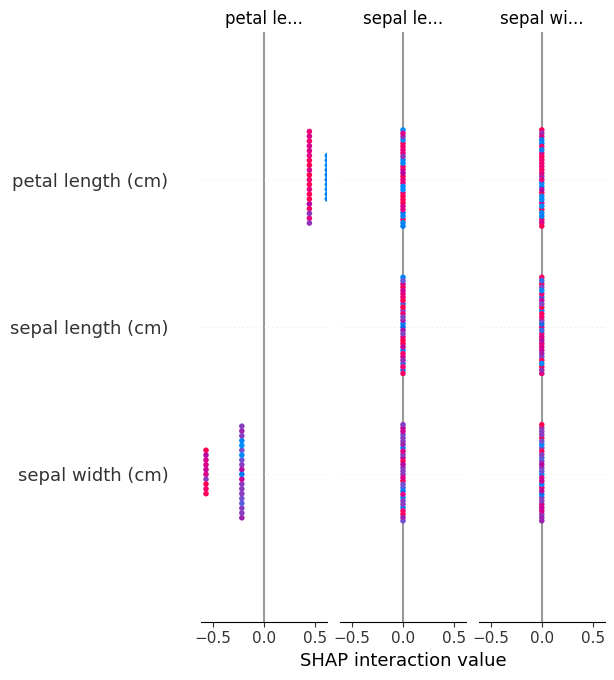

In [6]:
# Google Colab ready - Iris Dataset Classification
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import shap

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target  # multi-class target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Pipeline
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # optional for tree, useful for SHAP visuals
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Hyperparameter grid
param_grid = {
    'dt__max_depth': [2, 3, 4, 5, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__criterion': ['gini', 'entropy']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(clf_pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Evaluation
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# SHAP explainability
explainer = shap.TreeExplainer(best_model.named_steps['dt'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
